<a href="https://colab.research.google.com/github/SlLeonn/SenalesySistemas/blob/main/CUADERNO_SOLUCION_PARCIAL_1_SyS_2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Punto #1:

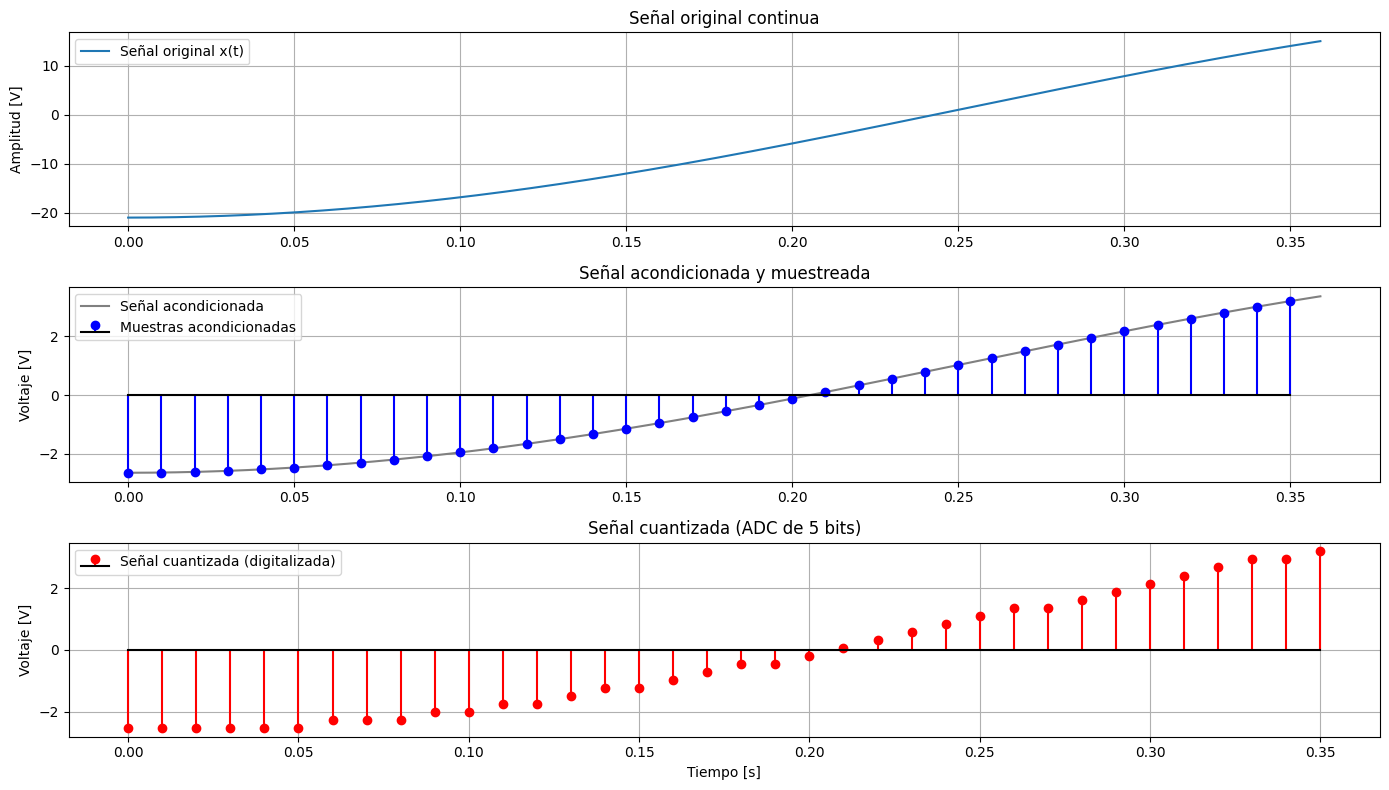

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Definición de la señal original
# -------------------------------
def x(t):
    return 20 * np.sin(7*t - np.pi/2) - 3 * np.cos(5*t) + 2 * np.cos(10*t)

# -------------------------------
# 2. Período fundamental
# -------------------------------
T0 = 2*np.pi / 35
t_cont = np.linspace(0, 2*T0, 1000)  # Señal continua (alta resolución)

# -------------------------------
# 3. Muestreo
# -------------------------------
fs = 100  # Frecuencia de muestreo mayor que 2*f_max
Ts = 1/fs
t_samp = np.arange(0, 2*T0, Ts)
x_samp = x(t_samp)

# -------------------------------
# 4. Acondicionamiento (escalado a rango -3.3V a 5V)
# -------------------------------
x_max = 25  # amplitud total máxima asumida para normalizar
x_norm = x_samp / x_max

# Escalado lineal al rango -3.3 a 5
V_min = -3.3
V_max = 5
x_cond = (V_max - V_min)/2 * x_norm + (V_max + V_min)/2

# -------------------------------
# 5. Cuantización (ADC de 5 bits)
# -------------------------------
bits = 5
N_levels = 2**bits
delta = (V_max - V_min) / N_levels

# Cuantización: redondear al múltiplo más cercano de delta dentro del rango
x_quant = np.round((x_cond - V_min) / delta) * delta + V_min

# -------------------------------
# 6. Gráficas
# -------------------------------
plt.figure(figsize=(14, 8))

# Señal original continua
plt.subplot(3,1,1)
plt.plot(t_cont, x(t_cont), label='Señal original x(t)')
plt.title('Señal original continua')
plt.grid(True)
plt.ylabel('Amplitud [V]')
plt.legend()

# Señal acondicionada y muestreada
plt.subplot(3,1,2)
plt.plot(t_cont, x(t_cont)/x_max * (V_max - V_min)/2 + (V_max + V_min)/2, label='Señal acondicionada', color='gray')
plt.stem(t_samp, x_cond, linefmt='b-', markerfmt='bo', basefmt='k', label='Muestras acondicionadas')
plt.title('Señal acondicionada y muestreada')
plt.grid(True)
plt.ylabel('Voltaje [V]')
plt.legend()

# Señal cuantizada
plt.subplot(3,1,3)
plt.stem(t_samp, x_quant, linefmt='r-', markerfmt='ro', basefmt='k', label='Señal cuantizada (digitalizada)')
plt.title('Señal cuantizada (ADC de 5 bits)')
plt.grid(True)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.legend()

plt.tight_layout()
plt.show()

Punto #2:

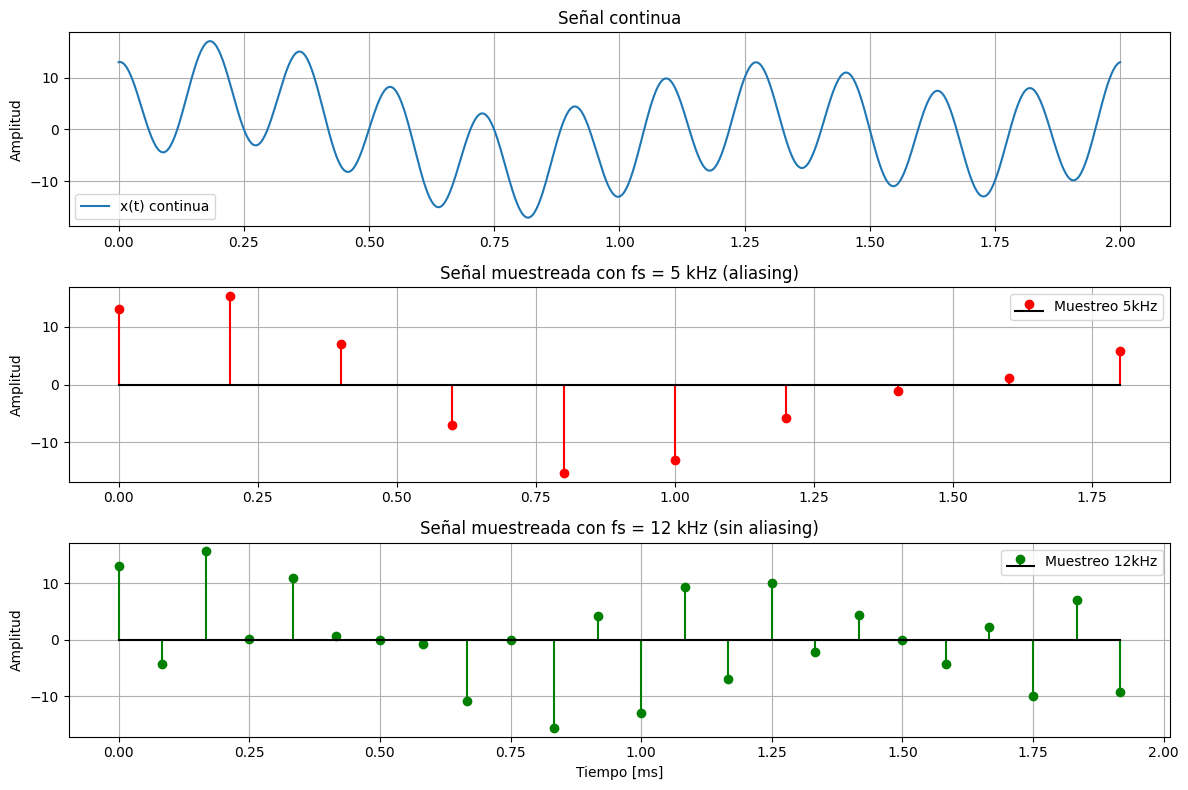

In [ ]:
# Señal original
def x(t):
    return 3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

# Tiempo continuo para referencia
t_cont = np.linspace(0, 2e-3, 1000)  # 2 ms para ver varios ciclos

# Muestreo 1: fs = 5 kHz (con aliasing)
fs1 = 5000
Ts1 = 1/fs1
t1 = np.arange(0, 2e-3, Ts1)
x1 = x(t1)

# Muestreo 2: fs = 12 kHz (sin aliasing)
fs2 = 12000
Ts2 = 1/fs2
t2 = np.arange(0, 2e-3, Ts2)
x2 = x(t2)

# Graficar
plt.figure(figsize=(12, 8))

# Señal original
plt.subplot(3,1,1)
plt.plot(t_cont*1000, x(t_cont), label='x(t) continua')
plt.title('Señal continua')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Muestreo con fs = 5kHz
plt.subplot(3,1,2)
plt.stem(t1*1000, x1, linefmt='r-', markerfmt='ro', basefmt='k', label='Muestreo 5kHz')
plt.title('Señal muestreada con fs = 5 kHz (aliasing)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Muestreo con fs = 12kHz
plt.subplot(3,1,3)
plt.stem(t2*1000, x2, linefmt='g-', markerfmt='go', basefmt='k', label='Muestreo 12kHz')
plt.title('Señal muestreada con fs = 12 kHz (sin aliasing)')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Punto #3

In [ ]:
import sympy as sp

# Declarar variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)

# Definir w0 y x1(t)
w0 = 2 * sp.pi / T
x1 = A * sp.cos(w0 * t)

# Definir x2(t) por tramos
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Definir la diferencia al cuadrado
diff_sq = sp.simplify((x1 - x2)**2)

# Calcular la integral de la distancia media en un periodo
d = (1 / T) * sp.integrate(diff_sq, (t, 0, T))

# Simplificar resultado
d_simpl = sp.simplify(d)

# Mostrar resultado
sp.pprint(d_simpl)


 2          
A    4⋅A    
── - ─── + 1
2     π     


Punto #4

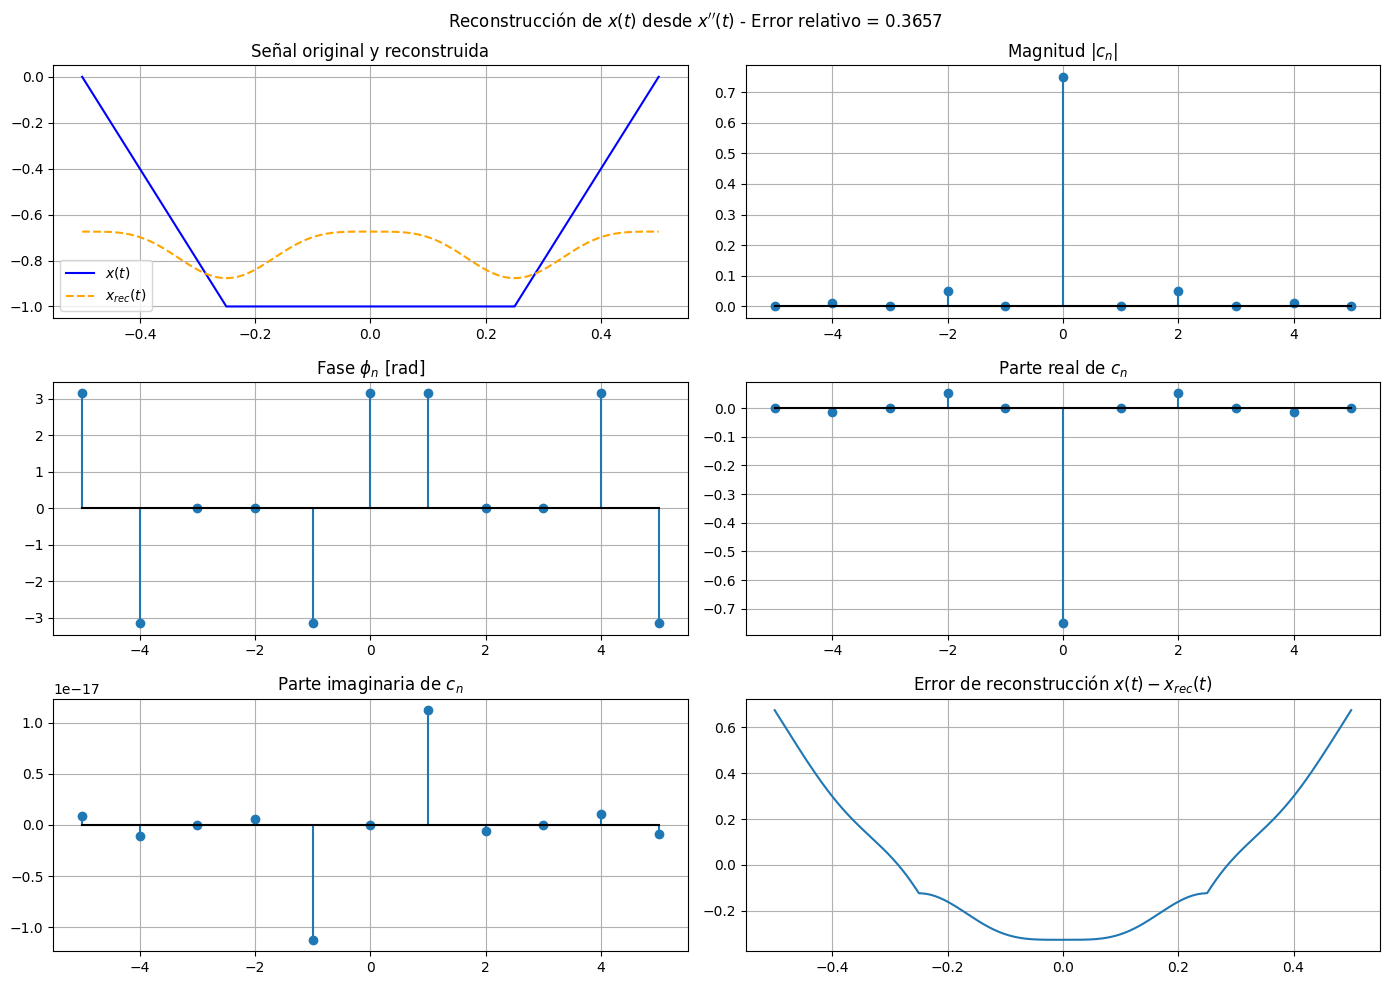

In [ ]:
from scipy.integrate import trapezoid

# --------------------- Parámetros ---------------------
A = 1
T = 1
w0 = 2 * np.pi / T
d1 = 0.25
d2 = 0.5
N = 5  # Número de armónicos positivos/negativos

# --------------------- Dominio temporal ---------------------
t = np.linspace(-T / 2, T / 2, 5000)
dt = t[1] - t[0]

# --------------------- Definición de x(t) ---------------------
def x_t(ti):
    ti_abs = np.abs(ti)
    if ti_abs <= d1:
        return -A
    elif d1 < ti_abs <= d2:
        return -A * (d2 - ti_abs) / (d2 - d1)
    else:
        return 0

x_vals = np.array([x_t(ti) for ti in t])

# --------------------- Segunda derivada numérica ---------------------
x_pp = np.gradient(np.gradient(x_vals, dt), dt)

# --------------------- Calcular coeficientes ---------------------
n_vals = np.arange(-N, N + 1)
c_n_x = []
# Calcular c_0 directamente desde x(t)
c0 = (1 / T) * trapezoid(x_vals, t)

for n in n_vals:
    if n == 0:
      c_n_x.append(c0)

    else:
        integrand = x_pp * np.exp(-1j * n * w0 * t)
        integral = trapezoid(integrand, t)
        c_n = -integral / (T * n**2 * w0**2)
        c_n_x.append(c_n)

c_n_x = np.array(c_n_x)

# --------------------- Reconstrucción de x(t) ---------------------
x_rec = np.zeros_like(t, dtype=complex)
for n, cn in zip(n_vals, c_n_x):
    x_rec += cn * np.exp(1j * n * w0 * t)

x_rec = np.real(x_rec)

# --------------------- Error relativo ---------------------
error = np.linalg.norm(x_vals - x_rec) / np.linalg.norm(x_vals)

# --------------------- Espectros ---------------------
mag = np.abs(c_n_x)
phase = np.angle(c_n_x)
real = np.real(c_n_x)
imag = np.imag(c_n_x)

# --------------------- Gráficas ---------------------
fig, axs = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle("Reconstrucción de $x(t)$ desde $x''(t)$ - Error relativo = {:.4f}".format(error))

axs[0, 0].plot(t, x_vals, color='blue', label='$x(t)$')
axs[0, 0].plot(t, x_rec, '--', color='orange', label='$x_{rec}(t)$')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_title("Señal original y reconstruida")

axs[0, 1].stem(n_vals, mag, basefmt="k")
axs[0, 1].set_title('Magnitud $|c_n|$')
axs[0, 1].grid(True)

axs[1, 0].stem(n_vals, phase, basefmt="k")
axs[1, 0].set_title('Fase $\\phi_n$ [rad]')
axs[1, 0].grid(True)

axs[1, 1].stem(n_vals, real, basefmt="k")
axs[1, 1].set_title('Parte real de $c_n$')
axs[1, 1].grid(True)

axs[2, 0].stem(n_vals, imag, basefmt="k")
axs[2, 0].set_title('Parte imaginaria de $c_n$')
axs[2, 0].grid(True)

axs[2, 1].plot(t, x_vals - x_rec)
axs[2, 1].set_title('Error de reconstrucción $x(t) - x_{rec}(t)$')
axs[2, 1].grid(True)

plt.tight_layout()
plt.show()